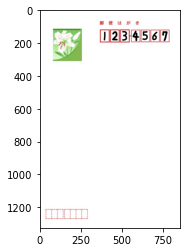

In [3]:
# 読み込む元画像
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("hagaki1.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

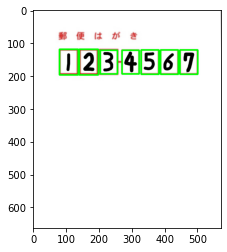

In [8]:
import cv2
import matplotlib.pyplot as plt

# ハガキ画像から郵便番号領域を抽出する関数
def detect_zipno(fname):
    # 画像を読み込む
    img = cv2.imread(fname)
    # 画像のサイズを求める
    h, w = img.shape[:2]
    # ハガキ画像の右上のみ抽出する
    img = img[0:h//2, w//3:]
    
    # 画像を二値化
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    im2= cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
    
    # 輪郭を抽出
    cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]
    
    # 抽出した輪郭を単純なリストに変換
    result = []
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        # 大きすぎる小さすぎる領域を除去
        if not(50< w < 70): continue
        result.append([x, y, w, h])
    # 抽出した輪郭が左側から並ぶようソート
    result = sorted(result, key = lambda x: x[0])
    # 抽出した輪郭が近すぎるものを除去
    result2 = []
    lastx = -100
    for x, y, w, h in result:
        if (x - lastx) < 10:continue
        result2.append([x, y, w, h])
        lastx = x
    # 緑色の枠を描画
    for x, y, w, h in result2:
        cv2.rectangle(img, (x, y), (w+x, y+h), (0, 255, 0), 3)
    return result2, img

if __name__ == '__main__':
    # ハガキ画像を指定して領域を抽出
    cnts, img = detect_zipno('hagaki1.png')

    # 画面に抽出結果を描画
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.savefig("detect-zip.png", dpi=200)
    plt.show()


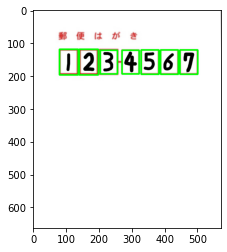

In [2]:
import cv2
import matplotlib.pyplot as plt

# ハガキ画像から郵便番号領域を抽出する関数
# 1)引数のfnameは何？
# →画像の名前、はがきのファイル名を受け取ることでいろいろなファイルに対応できる
# 2)この関数の戻り値は何？
# →郵便番号領域に緑色の四角を描画した画
# →その四角の位置（座標）
def detect_zipno(fname):
    # 画像を読み込む
    img = cv2.imread(fname)
    # 画像のサイズを求める
    # 3)なぜ img.shape[:2]で画像のサイズを求めることができるのか？この式の意味は？ 
    # →shapeで縦、横、チャネル（色）の値を求めることができるから
    # →img.shape[:2]はチャネルをデータから除去している
    h, w = img.shape[:2]
    # ハガキ画像の右上のみ抽出する 
    # 4)img[0:h//2, w//3:] の式の意味は？
    # →高さ÷２、幅÷３の整数部分をimgの新たな領域にしている
    # →必要な部分（画像の右上）だけ切り出している
    img = img[0:h//2, w//3:]
    
    # 画像を二値化
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 5)cv2.GaussianBlur(gray, (3, 3), 0) とは何をやっている処理か
    # →画像にぼかし処理を行っている
    gray = cv2.GaussianBlur(gray, (3, 3), 0) 
    # 6)cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1] は何をやっている処理か
    # →ぼかした画像を二値化している
    # 7)なぜ[1]がついているのか？    
    # →thresholdは閾値と結果の画像を残すが結果の画像だけほしいため
    im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
    
    # 輪郭を抽出
    # 8)cv2.findContours(im2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[0] は何をやっている処理か
    # →画像の輪郭を抽出するため
    # 9)それぞれの引数の意味は何か？
    # →im2:抽出したい画像、cv2.RETR_LIST：どのように抽出するか、cv2.CHAIN_APPROX_SIMPLE：輪郭の点をどの程度の密度で抽出するか
    # 10)[0]の意味は何か   
    # →findContoursの戻り値はリスト型になっている輪郭の情報が入っているのは0番目のため
    cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]
    
    # 抽出した輪郭を単純なリストに変換
    result = []
    # 11) cnts は何が入っている変数か？  
    # →抽出した輪郭：リスト型
    for pt in cnts:
        # 12)x, y, w, h = cv2.boundingRect(pt)は何を行っている処理か？  
        # →cv2.boundingRect：隣家うを囲むための長方形の領域を作る
        # →cv2.boundingRect：隣家うのデータを四角の位置（座標）を計算する
        x, y, w, h = cv2.boundingRect(pt)
        # 大きすぎる小さすぎる領域を除去
        # 13)50 と70は何を表す数か？   
        # →幅が５０～７０の範囲の場合、次の処理に進む
        if not(50 < w < 70): continue
        # 14) result.append([x, y, w, h])は何をやっている処理か？なぜappendを使う必要があるのか
        # →「出した輪郭を単純なリストに変換」で作成した空のリストに、抽出した輪郭の座標を代入している。 
        # →「append」はリストに新たな要素を追加する場合に使用する。
        result.append([x, y, w, h])
    # 抽出した輪郭が左側から並ぶようソート
    # 15)result = sorted(result, key=lambda x: x[0])は何をやっているか
    # →x軸をを基準にして、抽出した輪郭が0番目から並ぶようにソートを行う    
    result = sorted(result, key=lambda x: x[0])
    # 抽出した輪郭が近すぎるものを除去
    result2 = []
    lastx = -100
    for x, y, w, h in result:
        #16) if (x - lastx) < 10: continueは何をやっている処理か？
        #17) なぜ if (x - lastx) < 10 とするとその処理が行えるのか
        # →x - (-100)が10未満なら抽出した輪郭が近すぎると判断し処理をしない
        if (x - lastx) < 10: continue
        result2.append([x, y, w, h])
        lastx = x
    # 緑色の枠を描画
    for x, y, w, h in result2:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    return result2, img

# 18)if __name__ == '__main__':　とは何か？
# 19)__name__=='__main__'となるのはどのようなケースか？
# →ファイルが直接実行された場合
# 20)if __name__ == '__main__':を記載する理由、メリットは？
# →外部からインポートされた処理の場合、実行したくないソースコードをこのif以下に記載することができる
if __name__ == '__main__':
    # ハガキ画像を指定して領域を抽出
    cnts, img = detect_zipno("hagaki1.png")

    # 画面に抽出結果を描画
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.savefig("detect-zip.png", dpi=200)
    plt.show()

